### Veri Setini İndir

In [ ]:
from datasets import load_dataset

# Veri setini indir
dataset = load_dataset("yavuzkomecoglu/interpress_news_category_tr_lite")

# Veri setini TSV formatında kaydet
import pandas as pd

# Eğitim setini al
train_df = pd.DataFrame(dataset['train'])
# Test setini al
test_df = pd.DataFrame(dataset['test'])

# TSV formatında kaydet
train_df.to_csv('datasets/dataset1.tsv', sep='\t', index=False)
test_df.to_csv('datasets/dataset2.tsv', sep='\t', index=False)

### Veri Seti Label Kategorileri

<ul>
    <li>0 - Edebiyat</li>
    <li>1 - Ekonomi</li>
    <li>2 - Siyaset</li>
    <li>3 - Eğitim</li>
    <li>4 - Güvenlik</li>
    <li>5 - Spor</li>
    <li>6 - Teknoloji</li>
    <li>7 - Yaşam Tarzı</li>
    <li>8 - Outdoor/Spor Ekipmanları</li>
    <li>9 - Diplomasi</li>
</ul>


In [1]:
# Veri manipülasyonu ve analizi
import pandas as pd
import numpy as np

# Makine öğrenmesi
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Metin işleme
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from TurkishStemmer import TurkishStemmer
from itertools import product

# Dosya işlemleri
import pickle
import os



In [2]:
# -*- coding: utf-8 -*-

In [9]:

# NLTK gerekli dosyaları indirme
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\engin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\engin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Veri setini yükle
print("Veri seti yükleniyor...")
df = pd.read_csv('datasets/dataset1.tsv', sep='\t')


Veri seti yükleniyor...


In [5]:
df.head()

,news,label
0,50 yıldır yükselen enerji: Aygaz TÜRK HALKINI ...,1
1,Onur Akyıl Bir insan kadar mutsuzBir insan kad...,0
2,. yolculuk GÜNEYLİ SARIŞIN: REESE WITHERSPOON ...,0
3,Doğru tercih yapan hiçbir aday açıkta kalmayac...,3
4,De Jong için sıraya girdiler SERİE A ekipler...,5


In [6]:
print(df.shape)         # (satır, sütun)

(54721, 2)


In [7]:
df.isnull().sum()

news     0
label    0
dtype: int64

In [8]:
print(df.isnull().any().any())  # True → varsa, False → yoksa

False


In [9]:
df.info()  # Veri setinin bilgileri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54721 entries, 0 to 54720
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    54721 non-null  object
 1   label   54721 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 855.1+ KB


In [10]:
print(df.describe())

              label
count  54721.000000
mean       3.019170
std        2.953381
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max        9.000000


In [11]:
print(df["label"].unique())

[1 0 3 5 6 7 8 4 9 2]


 %% [markdown]
 # Metin Ön İşleme
 
 Bu script'te metin sınıflandırma için gerekli ön işleme adımlarını gerçekleştireceğiz:
 1. Metin temizleme
 2. Küçük harfe çevirme
 3. Stop words kaldırma
 4. Tokenization
 5. Stemming
 %% [markdown]
 ## Gerekli Kütüphanelerin Yüklenmesi


%% [markdown]
## Metin Temizleme

Bu bölümde:
- Metni küçük harfe çeviriyoruz
- Noktalama işaretlerini kaldırıyoruz
- Özel karakterleri temizliyoruz
- Fazla boşlukları düzenliyoruz


In [11]:
sample_text = df['news'].iloc[0]
print("Orijinal metin:")
print(sample_text)

Orijinal metin:
50 yıldır yükselen enerji: Aygaz TÜRK HALKINI TÜPGAZLA TANIŞTIRAN AYGAZ, 50. KURULUŞ YILINI KUTLUYOR. KOÇ HOLDİNG ŞEREF BAŞKANI VE AYGAZ YÖNETÎM KURULU BAŞKANI RAHMİ M. KOÇ,  BUGÜN AVRUPA NIN BEŞİNCİ BÜYÜK LPG ŞİRKETİ OLAN AYGAZ, ÜRETİMDEN DAĞITIMA UZANAN ENERJİ ZİNCİRİNİN TAMAMINA HÂKİM OLAN YEGÂNE ŞİRKETTİR. LİDER OLMAK ZORDUR. AMA LİDER KALABİLMEK ÇOK DAHA ZORDUR  DİYE KONUŞTU tc  AYOA3 YATIRIMCI VİZYONU Kurulduğu 1961 yılından bu yana gazdan petrole, elektrikten madenciliğe kadar enerjinin pek çok alanında faaliyet göstererek, milyonlarca tüketicinin güvenini kazanan Koç Grubu şirketlerinden Aygaz, 50. kuruluş yıldönümünü de enerji sektöründe Türkiye nin lider kuruluşlarından biri olarak kutluyor. Türkiye de konutlarda, havagazı ve ispirto ocaklarının kullanıldığı yıllarda Türk halkını tüpgazla tanıştıran Aygaz, yarım asırdır gösterdiği başarılarla Avrupa nın beşinci büyük LPG şirketine dönüştü. Koç Holding Şeref Başkanı ve Aygaz Yönetim Kurulu Başkanı Rahmi M. Koç,

In [12]:
# Küçük harfe çevirme
cleaned_text = sample_text.lower()
print("\nKüçük harfe çevrilmiş metin:")
print(cleaned_text)


Küçük harfe çevrilmiş metin:
50 yıldır yükselen enerji: aygaz türk halkini tüpgazla taniştiran aygaz, 50. kuruluş yilini kutluyor. koç holdi̇ng şeref başkani ve aygaz yönetîm kurulu başkani rahmi̇ m. koç,  bugün avrupa nin beşi̇nci̇ büyük lpg şi̇rketi̇ olan aygaz, üreti̇mden dağitima uzanan enerji̇ zi̇nci̇ri̇ni̇n tamamina hâki̇m olan yegâne şi̇rketti̇r. li̇der olmak zordur. ama li̇der kalabi̇lmek çok daha zordur  di̇ye konuştu tc  ayoa3 yatirimci vi̇zyonu kurulduğu 1961 yılından bu yana gazdan petrole, elektrikten madenciliğe kadar enerjinin pek çok alanında faaliyet göstererek, milyonlarca tüketicinin güvenini kazanan koç grubu şirketlerinden aygaz, 50. kuruluş yıldönümünü de enerji sektöründe türkiye nin lider kuruluşlarından biri olarak kutluyor. türkiye de konutlarda, havagazı ve ispirto ocaklarının kullanıldığı yıllarda türk halkını tüpgazla tanıştıran aygaz, yarım asırdır gösterdiği başarılarla avrupa nın beşinci büyük lpg şirketine dönüştü. koç holding şeref başkanı ve aygaz yö

In [14]:
# Noktalama işaretlerini kaldırma
import string
cleaned_text = re.sub(f'[{string.punctuation}]', ' ', cleaned_text)
print("\nNoktalama işaretleri kaldırılmış metin:")
print(cleaned_text)


Noktalama işaretleri kaldırılmış metin:
50 yıldır yükselen enerji  aygaz türk halkini tüpgazla taniştiran aygaz  50  kuruluş yilini kutluyor  koç holdi̇ng şeref başkani ve aygaz yönetîm kurulu başkani rahmi̇ m  koç   bugün avrupa nin beşi̇nci̇ büyük lpg şi̇rketi̇ olan aygaz  üreti̇mden dağitima uzanan enerji̇ zi̇nci̇ri̇ni̇n tamamina hâki̇m olan yegâne şi̇rketti̇r  li̇der olmak zordur  ama li̇der kalabi̇lmek çok daha zordur  di̇ye konuştu tc  ayoa3 yatirimci vi̇zyonu kurulduğu 1961 yılından bu yana gazdan petrole  elektrikten madenciliğe kadar enerjinin pek çok alanında faaliyet göstererek  milyonlarca tüketicinin güvenini kazanan koç grubu şirketlerinden aygaz  50  kuruluş yıldönümünü de enerji sektöründe türkiye nin lider kuruluşlarından biri olarak kutluyor  türkiye de konutlarda  havagazı ve ispirto ocaklarının kullanıldığı yıllarda türk halkını tüpgazla tanıştıran aygaz  yarım asırdır gösterdiği başarılarla avrupa nın beşinci büyük lpg şirketine dönüştü  koç holding şeref başkanı 

In [15]:
# Özel karakterleri kaldırma
cleaned_text = re.sub(r'[^a-zçğıöşü\s]', '', cleaned_text)
print("\nÖzel karakterler kaldırılmış metin:")
print(cleaned_text)


Özel karakterler kaldırılmış metin:
 yıldır yükselen enerji  aygaz türk halkini tüpgazla taniştiran aygaz    kuruluş yilini kutluyor  koç holding şeref başkani ve aygaz yönetm kurulu başkani rahmi m  koç   bugün avrupa nin beşinci büyük lpg şirketi olan aygaz  üretimden dağitima uzanan enerji zincirinin tamamina hkim olan yegne şirkettir  lider olmak zordur  ama lider kalabilmek çok daha zordur  diye konuştu tc  ayoa yatirimci vizyonu kurulduğu  yılından bu yana gazdan petrole  elektrikten madenciliğe kadar enerjinin pek çok alanında faaliyet göstererek  milyonlarca tüketicinin güvenini kazanan koç grubu şirketlerinden aygaz    kuruluş yıldönümünü de enerji sektöründe türkiye nin lider kuruluşlarından biri olarak kutluyor  türkiye de konutlarda  havagazı ve ispirto ocaklarının kullanıldığı yıllarda türk halkını tüpgazla tanıştıran aygaz  yarım asırdır gösterdiği başarılarla avrupa nın beşinci büyük lpg şirketine dönüştü  koç holding şeref başkanı ve aygaz yönetim kurulu başkanı rahmi 

In [16]:
# Fazla boşlukları temizleme
cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
print("\nFazla boşluklar temizlenmiş metin:")
print(cleaned_text)


Fazla boşluklar temizlenmiş metin:
yıldır yükselen enerji aygaz türk halkini tüpgazla taniştiran aygaz kuruluş yilini kutluyor koç holding şeref başkani ve aygaz yönetm kurulu başkani rahmi m koç bugün avrupa nin beşinci büyük lpg şirketi olan aygaz üretimden dağitima uzanan enerji zincirinin tamamina hkim olan yegne şirkettir lider olmak zordur ama lider kalabilmek çok daha zordur diye konuştu tc ayoa yatirimci vizyonu kurulduğu yılından bu yana gazdan petrole elektrikten madenciliğe kadar enerjinin pek çok alanında faaliyet göstererek milyonlarca tüketicinin güvenini kazanan koç grubu şirketlerinden aygaz kuruluş yıldönümünü de enerji sektöründe türkiye nin lider kuruluşlarından biri olarak kutluyor türkiye de konutlarda havagazı ve ispirto ocaklarının kullanıldığı yıllarda türk halkını tüpgazla tanıştıran aygaz yarım asırdır gösterdiği başarılarla avrupa nın beşinci büyük lpg şirketine dönüştü koç holding şeref başkanı ve aygaz yönetim kurulu başkanı rahmi m koç kuruluş yıldönümü n

In [17]:
# Türkçe stop words listesi
stop_words = set(stopwords.words('turkish'))


In [18]:
# Metni kelimelere ayırma
word_tokens = word_tokenize(cleaned_text)
print("Kelimelere ayrılmış metin:")
print(word_tokens)

Kelimelere ayrılmış metin:
['yıldır', 'yükselen', 'enerji', 'aygaz', 'türk', 'halkini', 'tüpgazla', 'taniştiran', 'aygaz', 'kuruluş', 'yilini', 'kutluyor', 'koç', 'holding', 'şeref', 'başkani', 've', 'aygaz', 'yönetm', 'kurulu', 'başkani', 'rahmi', 'm', 'koç', 'bugün', 'avrupa', 'nin', 'beşinci', 'büyük', 'lpg', 'şirketi', 'olan', 'aygaz', 'üretimden', 'dağitima', 'uzanan', 'enerji', 'zincirinin', 'tamamina', 'hkim', 'olan', 'yegne', 'şirkettir', 'lider', 'olmak', 'zordur', 'ama', 'lider', 'kalabilmek', 'çok', 'daha', 'zordur', 'diye', 'konuştu', 'tc', 'ayoa', 'yatirimci', 'vizyonu', 'kurulduğu', 'yılından', 'bu', 'yana', 'gazdan', 'petrole', 'elektrikten', 'madenciliğe', 'kadar', 'enerjinin', 'pek', 'çok', 'alanında', 'faaliyet', 'göstererek', 'milyonlarca', 'tüketicinin', 'güvenini', 'kazanan', 'koç', 'grubu', 'şirketlerinden', 'aygaz', 'kuruluş', 'yıldönümünü', 'de', 'enerji', 'sektöründe', 'türkiye', 'nin', 'lider', 'kuruluşlarından', 'biri', 'olarak', 'kutluyor', 'türkiye', 'de', 


%% [markdown]
# Stemming
# Bu bölümde:
 - Snowball stemmer kullanarak Türkçe kelimeleri köklerine indirgiyoruz
- Örneğin: "geliyor", "gelmiş", "gelecek" -> "gel"


In [19]:
# Stop words'leri kaldırma
filtered_text = [word for word in word_tokens if word not in stop_words]
print("\nStop words kaldırılmış metin:")
print(filtered_text)


Stop words kaldırılmış metin:
['yıldır', 'yükselen', 'enerji', 'aygaz', 'türk', 'halkini', 'tüpgazla', 'taniştiran', 'aygaz', 'kuruluş', 'yilini', 'kutluyor', 'koç', 'holding', 'şeref', 'başkani', 'aygaz', 'yönetm', 'kurulu', 'başkani', 'rahmi', 'm', 'koç', 'bugün', 'avrupa', 'nin', 'beşinci', 'büyük', 'lpg', 'şirketi', 'olan', 'aygaz', 'üretimden', 'dağitima', 'uzanan', 'enerji', 'zincirinin', 'tamamina', 'hkim', 'olan', 'yegne', 'şirkettir', 'lider', 'olmak', 'zordur', 'lider', 'kalabilmek', 'zordur', 'konuştu', 'tc', 'ayoa', 'yatirimci', 'vizyonu', 'kurulduğu', 'yılından', 'yana', 'gazdan', 'petrole', 'elektrikten', 'madenciliğe', 'kadar', 'enerjinin', 'pek', 'alanında', 'faaliyet', 'göstererek', 'milyonlarca', 'tüketicinin', 'güvenini', 'kazanan', 'koç', 'grubu', 'şirketlerinden', 'aygaz', 'kuruluş', 'yıldönümünü', 'enerji', 'sektöründe', 'türkiye', 'nin', 'lider', 'kuruluşlarından', 'olarak', 'kutluyor', 'türkiye', 'konutlarda', 'havagazı', 'ispirto', 'ocaklarının', 'kullanıldığı

In [20]:
# Kelimeleri birleştirme
filtered_text = ' '.join(filtered_text)
print("\nBirleştirilmiş metin:")
print(filtered_text)


Birleştirilmiş metin:
yıldır yükselen enerji aygaz türk halkini tüpgazla taniştiran aygaz kuruluş yilini kutluyor koç holding şeref başkani aygaz yönetm kurulu başkani rahmi m koç bugün avrupa nin beşinci büyük lpg şirketi olan aygaz üretimden dağitima uzanan enerji zincirinin tamamina hkim olan yegne şirkettir lider olmak zordur lider kalabilmek zordur konuştu tc ayoa yatirimci vizyonu kurulduğu yılından yana gazdan petrole elektrikten madenciliğe kadar enerjinin pek alanında faaliyet göstererek milyonlarca tüketicinin güvenini kazanan koç grubu şirketlerinden aygaz kuruluş yıldönümünü enerji sektöründe türkiye nin lider kuruluşlarından olarak kutluyor türkiye konutlarda havagazı ispirto ocaklarının kullanıldığı yıllarda türk halkını tüpgazla tanıştıran aygaz yarım asırdır gösterdiği başarılarla avrupa nın beşinci büyük lpg şirketine dönüştü koç holding şeref başkanı aygaz yönetim kurulu başkanı rahmi m koç kuruluş yıldönümü nedeniyle yaptığı açıklamada bugün avrupa nın beşinci büyük

 %% [markdown]
 ## Stemming
 
 Bu bölümde:
 - Snowball stemmer kullanarak Türkçe kelimeleri köklerine indirgiyoruz
 - Örneğin: "geliyor", "gelmiş", "gelecek" -> "gel"


In [21]:

stemmer = TurkishStemmer()

In [22]:
# Metni kelimelere ayırma
word_tokens = word_tokenize(filtered_text)

print(word_tokens)

['yıldır', 'yükselen', 'enerji', 'aygaz', 'türk', 'halkini', 'tüpgazla', 'taniştiran', 'aygaz', 'kuruluş', 'yilini', 'kutluyor', 'koç', 'holding', 'şeref', 'başkani', 'aygaz', 'yönetm', 'kurulu', 'başkani', 'rahmi', 'm', 'koç', 'bugün', 'avrupa', 'nin', 'beşinci', 'büyük', 'lpg', 'şirketi', 'olan', 'aygaz', 'üretimden', 'dağitima', 'uzanan', 'enerji', 'zincirinin', 'tamamina', 'hkim', 'olan', 'yegne', 'şirkettir', 'lider', 'olmak', 'zordur', 'lider', 'kalabilmek', 'zordur', 'konuştu', 'tc', 'ayoa', 'yatirimci', 'vizyonu', 'kurulduğu', 'yılından', 'yana', 'gazdan', 'petrole', 'elektrikten', 'madenciliğe', 'kadar', 'enerjinin', 'pek', 'alanında', 'faaliyet', 'göstererek', 'milyonlarca', 'tüketicinin', 'güvenini', 'kazanan', 'koç', 'grubu', 'şirketlerinden', 'aygaz', 'kuruluş', 'yıldönümünü', 'enerji', 'sektöründe', 'türkiye', 'nin', 'lider', 'kuruluşlarından', 'olarak', 'kutluyor', 'türkiye', 'konutlarda', 'havagazı', 'ispirto', 'ocaklarının', 'kullanıldığı', 'yıllarda', 'türk', 'halkını

In [23]:
# Her kelimeyi köküne indirgeme
stemmed_text = [stemmer.stem(word) for word in word_tokens]
print("Köklerine indirgenmiş kelimeler:")
print(stemmed_text)

Köklerine indirgenmiş kelimeler:
['yıl', 'yükselen', 'enerj', 'aygaz', 'türk', 'halkin', 'tüpgaz', 'taniştiran', 'aygaz', 'kuruluş', 'yil', 'kutluyor', 'koç', 'holding', 'şeref', 'başkani', 'aygaz', 'yönet', 'kuru', 'başkani', 'rahmi', 'm', 'koç', 'bugü', 'avrup', 'nin', 'beşinci', 'büyük', 'lpg', 'şirk', 'olan', 'aygaz', 'üret', 'dağitima', 'uzanan', 'enerj', 'zincir', 'tamamina', 'hkim', 'olan', 'yegn', 'şirket', 'lider', 'olmak', 'zor', 'lider', 'kalabilmek', 'zor', 'konuş', 'tc', 'ayo', 'yatirimç', 'vizyon', 'kurulduk', 'yıl', 'yan', 'gaz', 'petrole', 'elektrik', 'madencilik', 'kadar', 'enerj', 'pek', 'alan', 'faaliyet', 'göstererek', 'milyon', 'tüketiç', 'güven', 'kazanan', 'koç', 'grup', 'şirket', 'aygaz', 'kuruluş', 'yıldönüm', 'enerj', 'sektör', 'türki', 'nin', 'lider', 'kuruluş', 'olarak', 'kutluyor', 'türki', 'konut', 'havagaz', 'ispirto', 'ocak', 'kullanıldık', 'yıl', 'türk', 'halk', 'tüpgaz', 'tanıştıran', 'aygaz', 'yar', 'asır', 'gösterdik', 'başarı', 'avrup', 'nın', 'beşi

In [24]:
# Kelimeleri birleştirme
stemmed_text = ' '.join(stemmed_text)
print("\nBirleştirilmiş metin:")
print(stemmed_text)


Birleştirilmiş metin:
yıl yükselen enerj aygaz türk halkin tüpgaz taniştiran aygaz kuruluş yil kutluyor koç holding şeref başkani aygaz yönet kuru başkani rahmi m koç bugü avrup nin beşinci büyük lpg şirk olan aygaz üret dağitima uzanan enerj zincir tamamina hkim olan yegn şirket lider olmak zor lider kalabilmek zor konuş tc ayo yatirimç vizyon kurulduk yıl yan gaz petrole elektrik madencilik kadar enerj pek alan faaliyet göstererek milyon tüketiç güven kazanan koç grup şirket aygaz kuruluş yıldönüm enerj sektör türki nin lider kuruluş olarak kutluyor türki konut havagaz ispirto ocak kullanıldık yıl türk halk tüpgaz tanıştıran aygaz yar asır gösterdik başarı avrup nın beşinci büyük lpg şirket dönüş koç holding şeref başkan aygaz yöne kuru başkan rahmi m koç kuruluş yıldön neden yaptık açıklama bugü avrup nın beşinci büyük lpg şirk olan aygaz üret dağıt uzanan enerj zincir tamam hakim olan yegane k v mıfl şirket lider olmak zor lider kalabilmek zor aygaz zor başardık kent has yöntem de

 %% [markdown]
 ## Tüm Veri Setine Ön İşleme Uygulama


In [ ]:
print("Tüm veri setine ön işleme uygulanıyor...")

# Yeni bir DataFrame oluşturma
df2 = pd.DataFrame()
df2['news'] = df['news']  
df2['label'] = df['label']  
df2['processed_news'] = ''  




# Her metin için ön işleme uygulama
for i in range(len(df2)):
    # Metin temizleme
    text = df2['news'].iloc[i].lower()
    text = re.sub(f'[{string.punctuation}]', ' ', text)
    text = re.sub(r'[^a-zçğıöşü\s]', '', text)
    text = re.sub(r'[0-9]', '', text) # Rakamları kaldır
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Stop words kaldırma
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    text = ' '.join(filtered_text)
    
    # Tek harfleri kaldır
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if len(word) > 1]
    text = ' '.join(filtered_text)
    
    # Stemming
    word_tokens = word_tokenize(text)
    stemmed_text = [stemmer.stem(word) for word in word_tokens]
    text = ' '.join(stemmed_text)
    
    # İşlenmiş metni kaydetme
    df2.loc[i, 'processed_news'] = text
    
    # İlerleme durumunu gösterme
    if (i + 1) % 1000 == 0:
        print(f"{i + 1} metin işlendi...")


In [26]:
# İşlenmiş veri setinin ilk 5 satırını görüntüleme
print("İşlenmiş veri setinin ilk 5 satırı:")
print(df2[['news', 'processed_news', 'label']].head())


İşlenmiş veri setinin ilk 5 satırı:
                                                news  \
0  50 yıldır yükselen enerji: Aygaz TÜRK HALKINI ...   
1  Onur Akyıl Bir insan kadar mutsuzBir insan kad...   
2  . yolculuk GÜNEYLİ SARIŞIN: REESE WITHERSPOON ...   
3  Doğru tercih yapan hiçbir aday açıkta kalmayac...   
4  De Jong için sıraya girdiler   SERİE A ekipler...   

                                      processed_news  label  
0  yıl yükselen enerj aygaz türk halkin tüpgaz ta...      1  
1  onur akyıl bir insan kadar mutsuzbir insan kad...      0  
2  yolculuk güney sariş rees witherspoon yet yaş ...      0  
3  doğr tercih yapan hiçbir aday açık kalmayacak ...      3  
4  jong sıra girt seri ekip mi lan ın başarı oyun...      5  


In [27]:
# news sütununu silme
df2 = df2.drop('news', axis=1)
print("'news' sütunu silindi.")


'news' sütunu silindi.


In [28]:
# Veri setini kaydetme
df2.to_csv('datasets/processed_dataset2.csv', index=False)
print("İşlenmiş veri seti kaydedildi.")


İşlenmiş veri seti kaydedildi.


In [29]:
df2.head()

,label,processed_news
0,1,yıl yükselen enerj aygaz türk halkin tüpgaz ta...
1,0,onur akyıl bir insan kadar mutsuzbir insan kad...
2,0,yolculuk güney sariş rees witherspoon yet yaş ...
3,3,doğr tercih yapan hiçbir aday açık kalmayacak ...
4,5,jong sıra girt seri ekip mi lan ın başarı oyun...


# Model Eğitme 

In [31]:
# Veriyi eğitim ve test setlerine ayırma
X = df2['processed_news']
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# TF-IDF vektörizasyonu
print("TF-IDF vektörizasyonu yapılıyor...")
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print("Vektörizasyon tamamlandı.")

TF-IDF vektörizasyonu yapılıyor...
Vektörizasyon tamamlandı.


In [33]:
# Naive Bayes Model Eğitimi ve Değerlendirmesi
print("\n=== Naive Bayes Model Eğitimi ===")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


=== Naive Bayes Model Eğitimi ===


MultinomialNB()

In [34]:
# TF-IDF vektörizasyonu
print("TF-IDF vektörizasyonu yapılıyor...")
tfidf = TfidfVectorizer(
    max_features=5000,  # En sık kullanılan 5000 kelimeyi al
    min_df=2,  # En az 2 dokümanda geçen kelimeleri al
    max_df=0.95,  # Dokümanların en fazla %95'inde geçen kelimeleri al
    ngram_range=(1, 2)  # Tek kelime ve iki kelimelik kombinasyonları al
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print("Vektörizasyon tamamlandı.")

# Naive Bayes Model Eğitimi ve Değerlendirmesi
print("\n=== Naive Bayes Model Eğitimi ===")
nb_model = MultinomialNB(
    alpha=0.1,  # Laplace/Lidstone smoothing parametresi
    fit_prior=True,  # Sınıf olasılıklarını veriden öğren
    class_prior=None  # Sınıf ağırlıklarını otomatik hesapla
)
nb_model.fit(X_train_tfidf, y_train)

# Naive Bayes Cross Validation
nb_cv_scores = cross_val_score(nb_model, X_train_tfidf, y_train, cv=5)
print(f"Naive Bayes 5-Fold Cross Validation Skorları: {nb_cv_scores}")
print(f"Ortalama CV Skoru: {nb_cv_scores.mean():.4f} (+/- {nb_cv_scores.std() * 2:.4f})")

TF-IDF vektörizasyonu yapılıyor...
Vektörizasyon tamamlandı.

=== Naive Bayes Model Eğitimi ===
Naive Bayes 5-Fold Cross Validation Skorları: [0.83211512 0.83083952 0.82935465 0.82033124 0.82798401]
Ortalama CV Skoru: 0.8281 (+/- 0.0083)


In [35]:
# Naive Bayes Test Seti Değerlendirmesi
nb_pred = nb_model.predict(X_test_tfidf)
nb_score = nb_model.score(X_test_tfidf, y_test)
print(f"\nNaive Bayes Test Seti Doğruluk Oranı: {nb_score:.4f}")
print("\nNaive Bayes Sınıflandırma Raporu:")
print(classification_report(y_test, nb_pred))


Naive Bayes Test Seti Doğruluk Oranı: 0.8315

Naive Bayes Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      3539
           1       0.81      0.85      0.83      1813
           2       0.66      0.82      0.73       488
           3       0.72      0.80      0.75       525
           4       0.64      0.63      0.63       348
           5       0.98      0.93      0.96      1162
           6       0.92      0.83      0.87      1594
           7       0.71      0.38      0.50       291
           8       0.89      0.77      0.82       943
           9       0.90      0.85      0.87       242

    accuracy                           0.83     10945
   macro avg       0.80      0.77      0.78     10945
weighted avg       0.84      0.83      0.83     10945



# Naive Bayes Model Performans Analizi

Naive Bayes modelinin test seti üzerindeki performansı orta düzeydedir:

- Genel doğruluk oranı %58.17 ile geliştirilmeye açıktır
- Sınıf bazında performans:
  - Sınıf 0: Yüksek recall (1.00) ancak düşük precision (0.45) - Model bu sınıfı aşırı tahmin ediyor
  - Sınıf 1, 5 ve 6: Makul performans (F1: 0.68-0.76)
  - Sınıf 8: Yüksek precision (1.00) ancak çok düşük recall (0.20)
  - Sınıf 2, 3, 4, 7 ve 9: Hiç tahmin yapılamamış (F1: 0.00)

Önemli gözlemler:
- Model bazı sınıfları hiç tahmin edemiyor
- Precision ve recall değerleri arasında büyük dengesizlikler var
- Ağırlıklı ortalama metriklerin düşük olması, modelin genel performansının yetersiz olduğunu gösteriyor

Bu sonuçlar, modelin iyileştirilmesi gerektiğini ve veri dengesizliği sorunlarının ele alınması gerektiğini göstermektedir.


In [36]:
# SVM Model Eğitimi ve Değerlendirmesi
print("\n=== SVM Model Eğitimi ===")
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)


=== SVM Model Eğitimi ===


C:\Users\engin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=42)

In [37]:
# SVM Cross Validation
svm_cv_scores = cross_val_score(svm_model, X_train_tfidf, y_train, cv=5)
print(f"SVM 5-Fold Cross Validation Skorları: {svm_cv_scores}")
print(f"Ortalama CV Skoru: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std() * 2:.4f})")

C:\Users\engin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\engin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\engin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\User

SVM 5-Fold Cross Validation Skorları: [0.8656921  0.86133638 0.8709309  0.86499143 0.86579098]
Ortalama CV Skoru: 0.8657 (+/- 0.0061)


In [38]:
# SVM Test Seti Değerlendirmesi
svm_pred = svm_model.predict(X_test_tfidf)
svm_score = svm_model.score(X_test_tfidf, y_test)
print(f"\nSVM Test Seti Doğruluk Oranı: {svm_score:.4f}")
print("\nSVM Sınıflandırma Raporu:")
print(classification_report(y_test, svm_pred))


SVM Test Seti Doğruluk Oranı: 0.8715

SVM Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3539
           1       0.87      0.87      0.87      1813
           2       0.83      0.78      0.80       488
           3       0.83      0.81      0.82       525
           4       0.76      0.64      0.70       348
           5       0.96      0.96      0.96      1162
           6       0.90      0.90      0.90      1594
           7       0.73      0.55      0.63       291
           8       0.88      0.85      0.87       943
           9       0.91      0.86      0.89       242

    accuracy                           0.87     10945
   macro avg       0.85      0.81      0.83     10945
weighted avg       0.87      0.87      0.87     10945



# Model Performans Analizi

SVM modelinin test seti üzerindeki performansı oldukça başarılı görünmektedir:

- Genel doğruluk oranı %87.48 ile yüksek bir seviyededir
- Sınıf bazında performans:
  - Sınıf 5 en iyi performansı göstermiştir (F1: 0.97)
  - Sınıf 7 en düşük performansı göstermiştir (F1: 0.59)
  - Çoğu sınıf için F1 skoru 0.80'in üzerindedir
  
Özellikle:
- Sınıf 0 ve 1 dengeli performans göstermiştir (F1: 0.88)
- Sınıf 6, 8 ve 9'da yüksek başarı elde edilmiştir (F1: 0.87-0.90)
- Sınıf 4 ve 7'de göreceli olarak daha düşük performans gözlenmiştir

Model genel olarak dengeli bir sınıflandırma performansı sergilemektedir. Makro ve ağırlıklı ortalama metriklerin birbirine yakın olması, modelin tüm sınıflarda tutarlı çalıştığını göstermektedir.


In [39]:

# Confusion Matrix Görselleştirmesi
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(50.722222222222214, 0.5, 'Gerçek Sınıf')

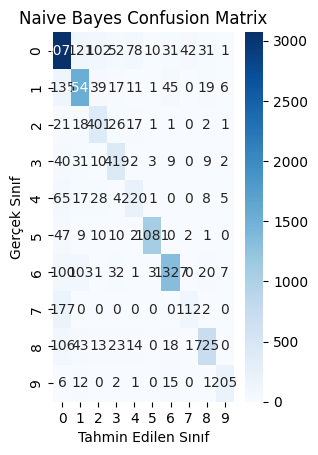

In [40]:
# Naive Bayes Confusion Matrix
plt.subplot(1, 2, 1)
nb_cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')

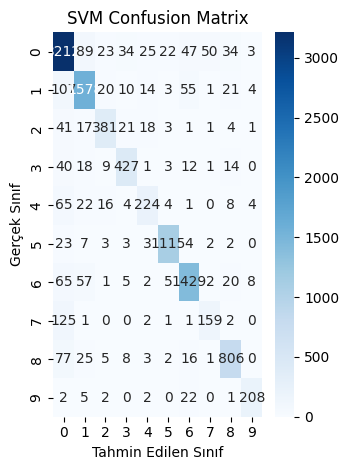

In [41]:

# SVM Confusion Matrix
plt.subplot(1, 2, 2)
svm_cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')

plt.tight_layout()
plt.show()

In [42]:
# Model Karşılaştırma Grafiği
plt.figure(figsize=(10, 6))
models = ['Naive Bayes', 'SVM']
test_scores = [nb_score, svm_score]
cv_scores = [nb_cv_scores.mean(), svm_cv_scores.mean()]

<Figure size 1000x600 with 0 Axes>

In [43]:

x = np.arange(len(models))
width = 0.35

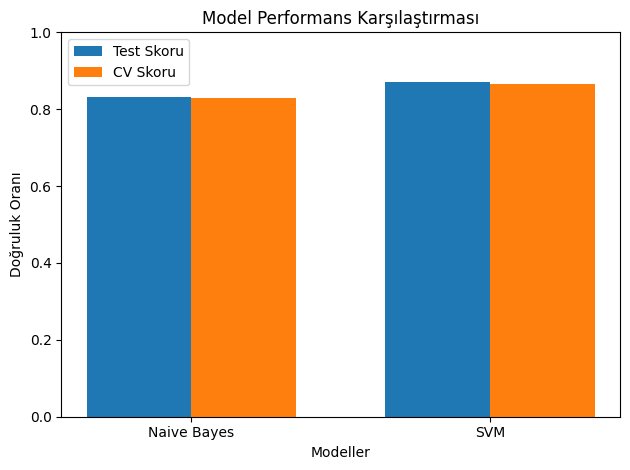

In [44]:
plt.bar(x - width/2, test_scores, width, label='Test Skoru')
plt.bar(x + width/2, cv_scores, width, label='CV Skoru')

plt.xlabel('Modeller')
plt.ylabel('Doğruluk Oranı')
plt.title('Model Performans Karşılaştırması')
plt.xticks(x, models)
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [45]:
# Veri setini yükle
print("Veri seti yükleniyor...")
df3 = pd.read_csv('datasets/processed_dataset.csv')

Veri seti yükleniyor...


In [46]:
df3.head()

,label,processed_news
0,1,yıl yükselen enerj aygaz türk halkin tüpgaz ta...
1,0,onur akyıl bir insan kadar mutsuzbir insan kad...
2,0,yolculuk güney sariş rees witherspoon yet yaş ...
3,3,doğr tercih yapan hiçbir aday açık kalmayacak ...
4,5,jong sıra girt seri a ekip mi i lan ın başarı ...


In [49]:
# Örnek metinler üzerinde tahmin
ornek_metinler = [
    "Fenerbahçe bugün önemli bir galibiyet aldı",  # Spor haberi
    "Dolar kuru rekor seviyeye ulaştı",  # Ekonomi haberi
    "Yeni çıkan filmin galası yapıldı",  # Magazin haberi
    "Üniversite sınavı tarihleri açıklandı"  # Eğitim haberi
]

# Gerekli kütüphaneleri import etme
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Stop words'leri yükleme
stop_words = set(stopwords.words('turkish'))

# TF-IDF Vectorizer'ı yeniden oluşturma ve eğitme
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(df3['processed_news'])
y_train = df3['label']

# Modelleri yeniden eğitme
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

# Kategori etiketleri
kategoriler = {
    0: "Edebiyat",
    1: "Ekonomi", 
    2: "Siyaset",
    3: "Eğitim",
    4: "Güvenlik",
    5: "Spor",
    6: "Teknoloji",
    7: "Yaşam Tarzı",
    8: "Outdoor/Spor Ekipmanları",
    9: "Diplomasi"
}

# Örnek metinleri aynı preprocessing işlemlerinden geçirme
processed_ornekler = []
for metin in ornek_metinler:
    try:
        # Küçük harfe çevirme
        metin = metin.lower()
        # Noktalama işaretlerini kaldırma
        metin = re.sub(r'[^\w\s]', '', metin)
        # Stopwords'leri kaldırma
        word_tokens = word_tokenize(metin)
        filtered_text = [word for word in word_tokens if word not in stop_words]
        # Stemming yerine kelimeleri olduğu gibi bırakma
        processed_ornekler.append(' '.join(filtered_text))
    except Exception as e:
        print(f"Metin işleme hatası: {str(e)}")

try:
    # TF-IDF dönüşümü
    ornek_tfidf = tfidf_vectorizer.transform(processed_ornekler)

    # Her iki model ile tahmin yapma
    print("Naive Bayes Tahminleri:")
    nb_tahminler = nb_model.predict(ornek_tfidf)
    for metin, tahmin in zip(ornek_metinler, nb_tahminler):
        print(f"Metin: {metin}")
        print(f"Tahmin edilen kategori: {kategoriler[tahmin]}\n")

    print("\nSVM Tahminleri:")
    svm_tahminler = svm_model.predict(ornek_tfidf)
    for metin, tahmin in zip(ornek_metinler, svm_tahminler):
        print(f"Metin: {metin}")
        print(f"Tahmin edilen kategori: {kategoriler[tahmin]}\n")

except Exception as e:
    print(f"Tahmin yapma hatası: {str(e)}")


C:\Users\engin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Naive Bayes Tahminleri:
Metin: Fenerbahçe bugün önemli bir galibiyet aldı
Tahmin edilen kategori: Spor

Metin: Dolar kuru rekor seviyeye ulaştı
Tahmin edilen kategori: Ekonomi

Metin: Yeni çıkan filmin galası yapıldı
Tahmin edilen kategori: Edebiyat

Metin: Üniversite sınavı tarihleri açıklandı
Tahmin edilen kategori: Edebiyat


SVM Tahminleri:
Metin: Fenerbahçe bugün önemli bir galibiyet aldı
Tahmin edilen kategori: Spor

Metin: Dolar kuru rekor seviyeye ulaştı
Tahmin edilen kategori: Ekonomi

Metin: Yeni çıkan filmin galası yapıldı
Tahmin edilen kategori: Edebiyat

Metin: Üniversite sınavı tarihleri açıklandı
Tahmin edilen kategori: Eğitim



In [48]:
# Her kategoriden bir örnek getirme
ornek_kategoriler = df3.groupby('label').first().reset_index()

# Sonuçları bir txt dosyasına yazma
with open('kategori_ornekleri.txt', 'w', encoding='utf-8') as f:
    f.write("Her kategoriden bir örnek:\n\n")
    for _, row in ornek_kategoriler.iterrows():
        f.write(f"Kategori {row['label']}:\n")
        f.write(f"{row['processed_news']}\n\n")
    
print("Sonuçlar kategori_ornekleri.txt dosyasına kaydedildi.")


Sonuçlar kategori_ornekleri.txt dosyasına kaydedildi.


In [51]:

try:
    # Models klasörünü oluştur
    if not os.path.exists('models'):
        os.makedirs('models')

    # Naive Bayes ve SVM modellerini kaydet
    with open('models/naive_bayes_model.pkl', 'wb') as f:
        pickle.dump(nb_model, f)
    with open('models/svm_model.pkl', 'wb') as f:
        pickle.dump(svm_model, f)

    # TF-IDF vectorizer'ı kaydet
    with open('models/tfidf_vectorizer.pkl', 'wb') as f:
        pickle.dump(tfidf_vectorizer, f)

    # Kategorileri kaydet
    with open('models/kategoriler.pkl', 'wb') as f:
        pickle.dump(kategoriler, f)

    print('Modeller models klasörüne başarıyla kaydedildi.')
    print('TF-IDF vectorizer ve kategoriler models klasörüne başarıyla kaydedildi.')

except Exception as e:
    print(f"Model kaydetme hatası: {str(e)}")


Modeller başarıyla kaydedildi.
TF-IDF vectorizer ve kategoriler başarıyla kaydedildi.
